In [127]:
# Importing analysis and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [5]:
# Load the cleaned data
clean_df = pd.read_csv('../data/clean_hr_employee_attrition.csv')

In [9]:
# Preview the data
clean_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,4,1,6,3,3,2,2,2,2


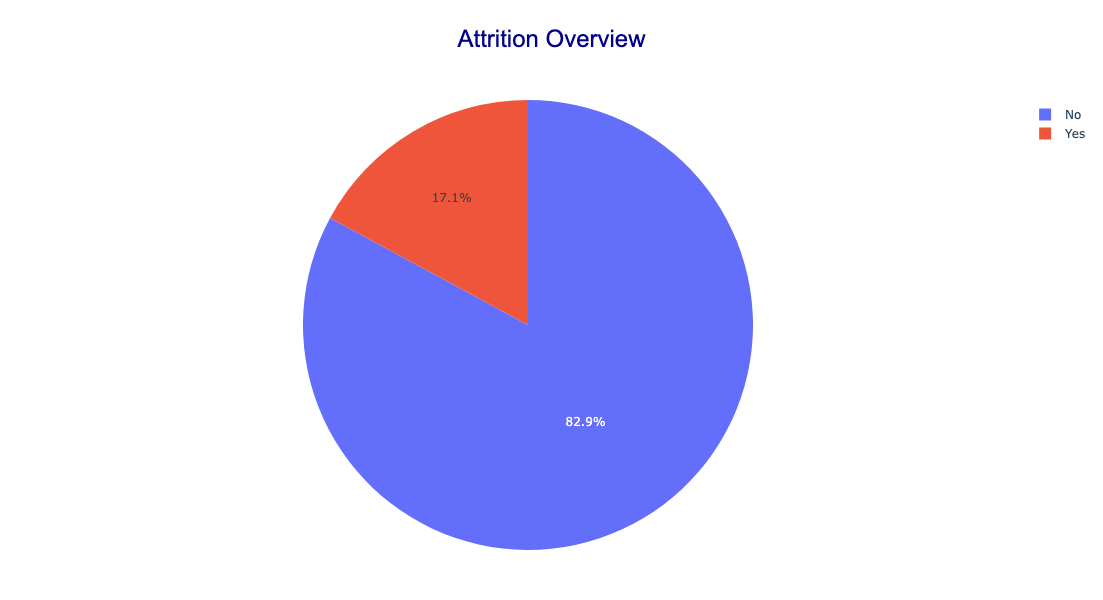

In [60]:
# Attrition Overview
attrition_counts = clean_df['Attrition'].value_counts()

# Create a pie chart
fig = px.pie(
    values=attrition_counts.values,
    names=attrition_counts.index,
    title='Attrition Distribution'
)

# Enhance the visualization
fig.update_layout(
    title={
        'text': 'Attrition Overview',  # Update the title text
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center',  # Anchor title at the center
        'y': 0.95,  # Adjust the vertical position to add space below
        'yanchor': 'top',  # Anchor title at the top
    },
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),  # Customize font
    width=1100,  # Increase the width of the chart
    height=600,  # Increase the height of the chart
    margin=dict(t=100, b=50, l=50, r=50)  # Add more margin at the top for spacing
)

# Show the chart
fig.show()

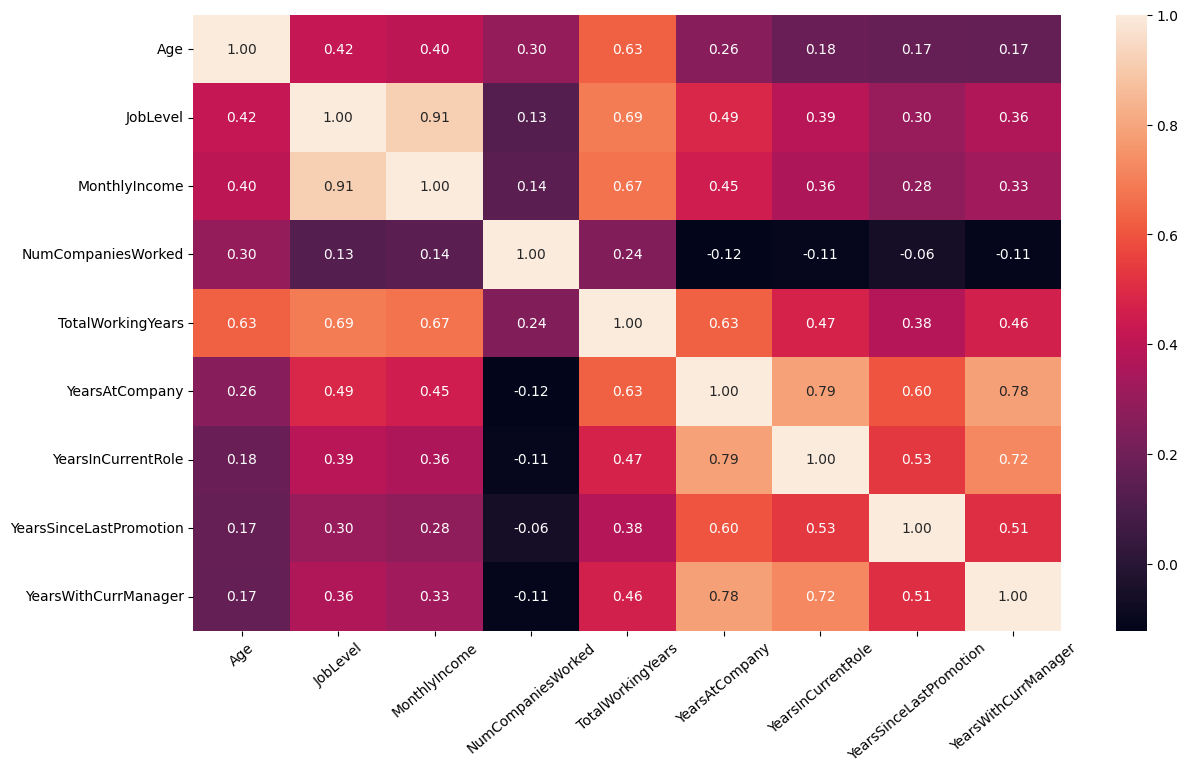

In [85]:
# Calculate the correlation matrix
correlation = clean_df[['Age','JobLevel','MonthlyIncome','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,fmt='.2f',annot=True)
plt.xticks(rotation=40)
plt.show()

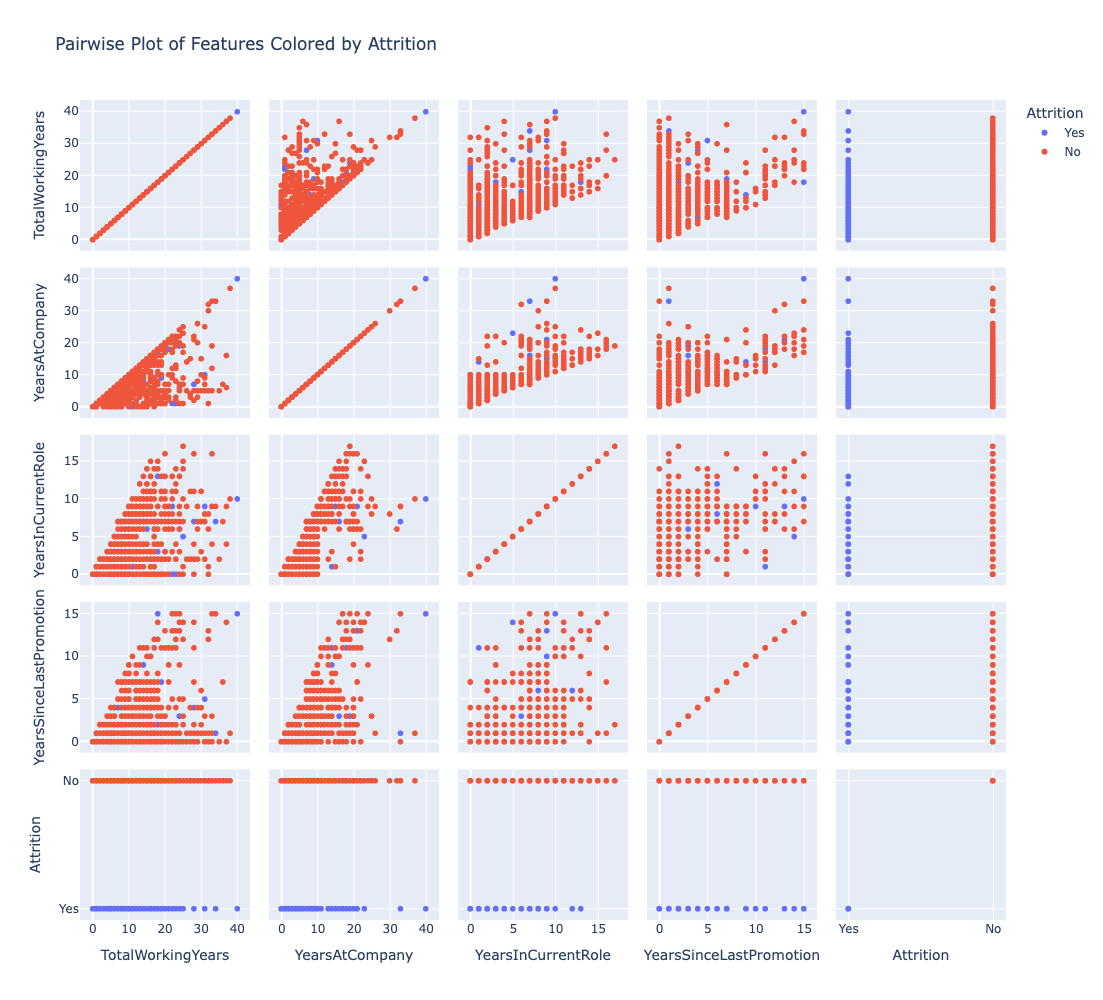

In [99]:
# Define the columns for pairwise plots
columns = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition']

# Create a pairwise plot using plotly express, coloring by 'Attrition'
fig = px.scatter_matrix(clean_df[columns], color='Attrition', 
                        title="Pairwise Plot of Features Colored by Attrition")

# Update layout to make the figure larger
fig.update_layout(
    width=1100,  # Increase width
    height=1000,  # Increase height
    autosize=True  # Enable auto resize when zooming in/out
)

# Show the plot
fig.show()

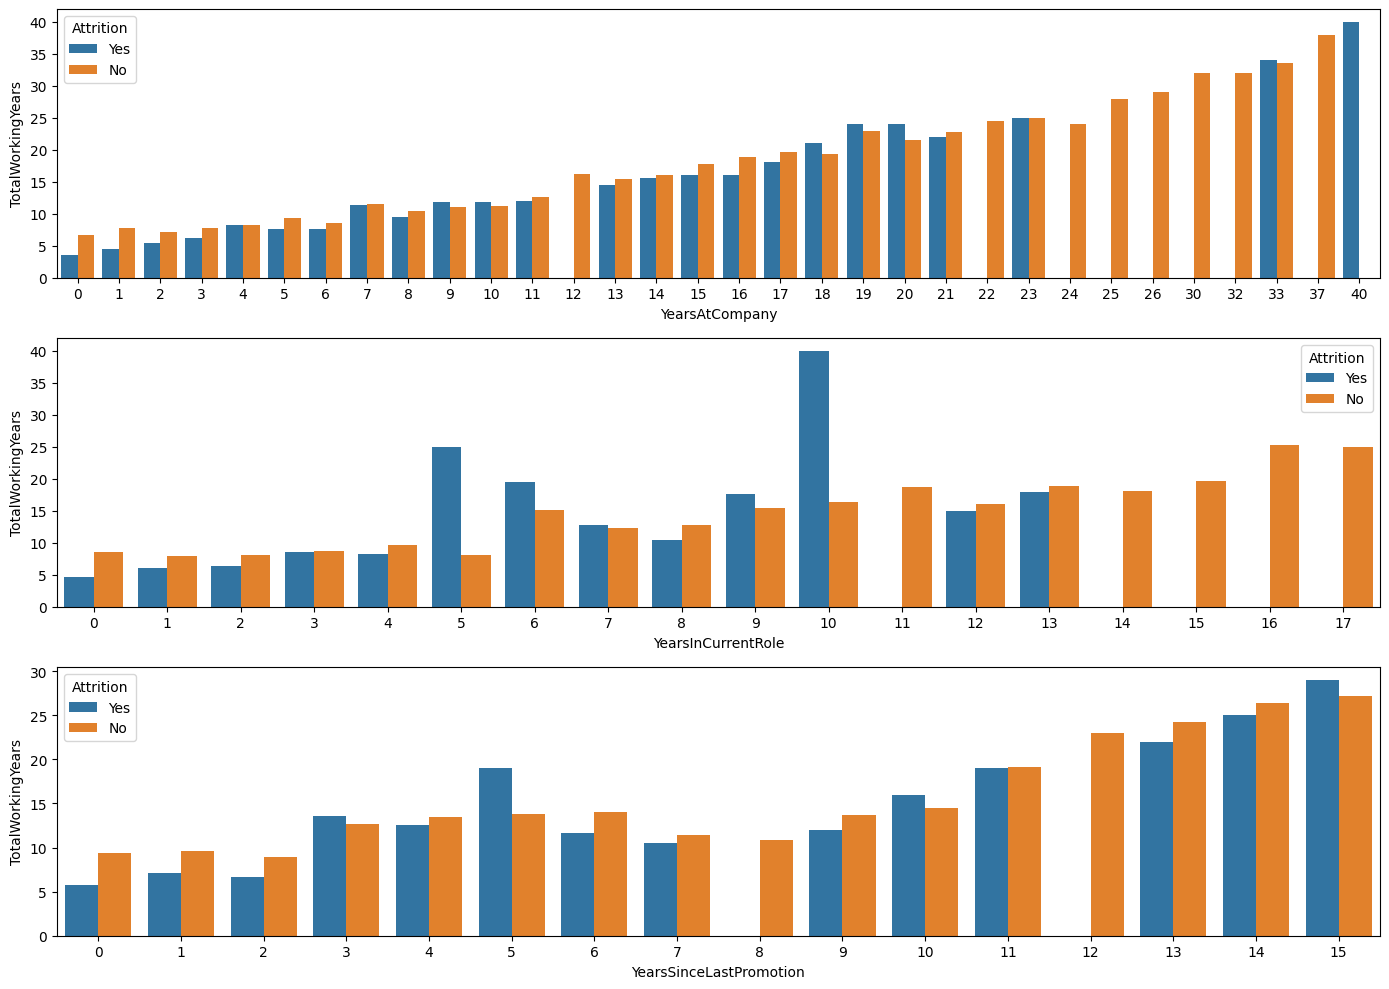

In [125]:
# Define the columns for plotting
columns = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 10))

# Loop through the columns and create a barplot for each
for i, col in enumerate(columns):
    sns.barplot(x=clean_df[col], y=clean_df['TotalWorkingYears'], ax=axes[i], hue=clean_df['Attrition'], errorbar=None)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('TotalWorkingYears')

plt.tight_layout()  # Adjust the spacing between the plots
plt.show()

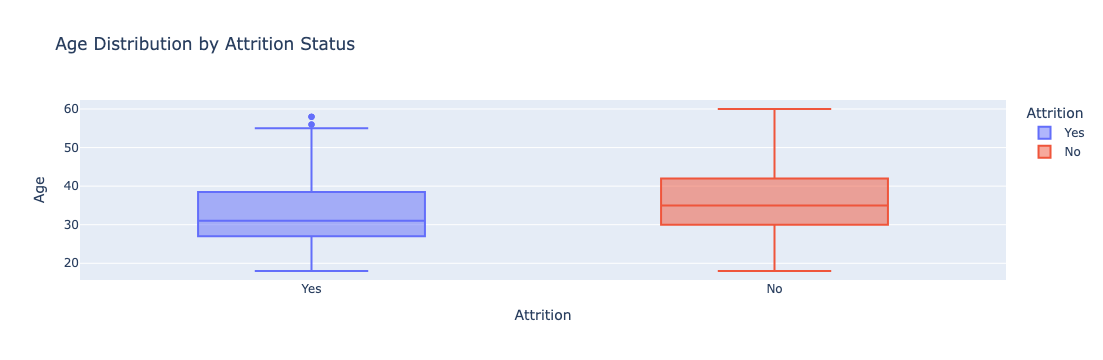

In [23]:
# Age vs. Attrition
fig = px.box(clean_df, x='Attrition', y='Age', color='Attrition',
             title='Age Distribution by Attrition Status')
fig.show()

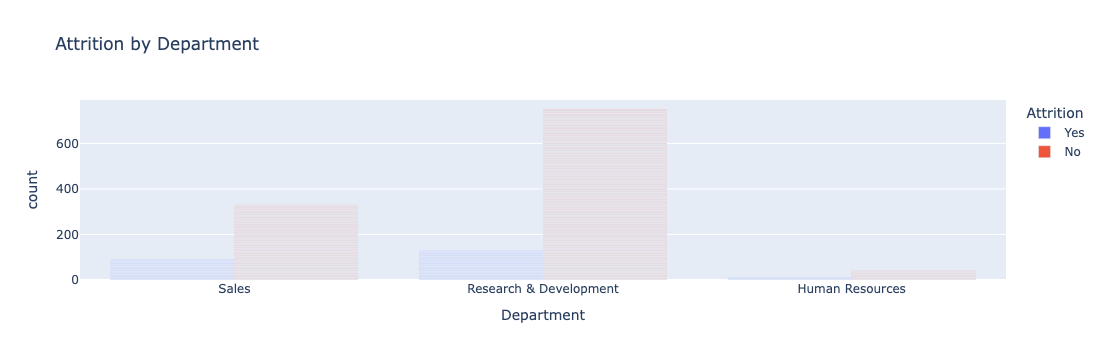

In [27]:
# Department-wise Attrition
fig = px.bar(clean_df, x='Department', color='Attrition', 
             title='Attrition by Department', barmode='group')
fig.show()

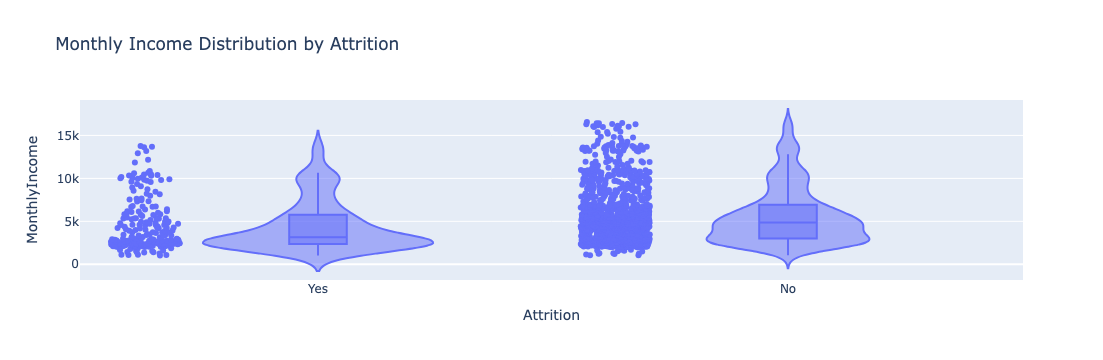

In [31]:
# Monthly Income Distribution
fig = px.violin(clean_df, y='MonthlyIncome', x='Attrition', 
                box=True, points='all',
                title='Monthly Income Distribution by Attrition')
fig.show()

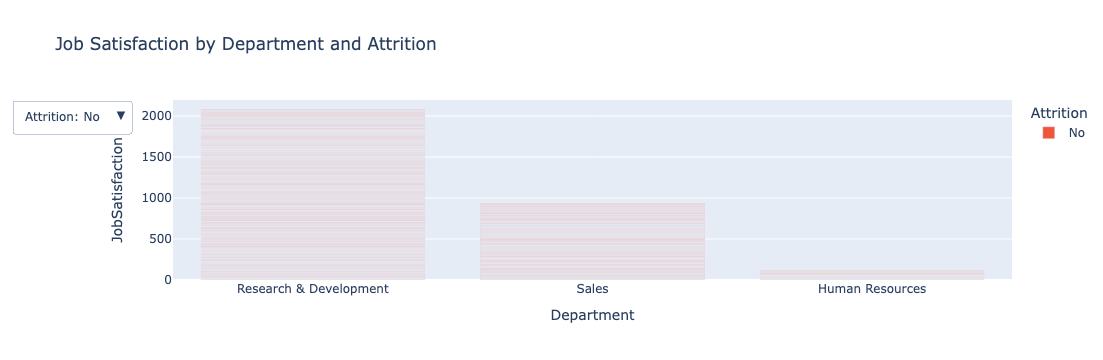

In [39]:
fig = px.bar(clean_df, x='Department', y='JobSatisfaction', color='Attrition',
             title='Job Satisfaction by Department and Attrition')
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {'label': 'Attrition: Yes', 
                 'method': 'update', 
                 'args': [{'visible': [True, False]}]},
                {'label': 'Attrition: No', 
                 'method': 'update', 
                 'args': [{'visible': [False, True]}]},
            ]
        }
    ]
)
fig.show()

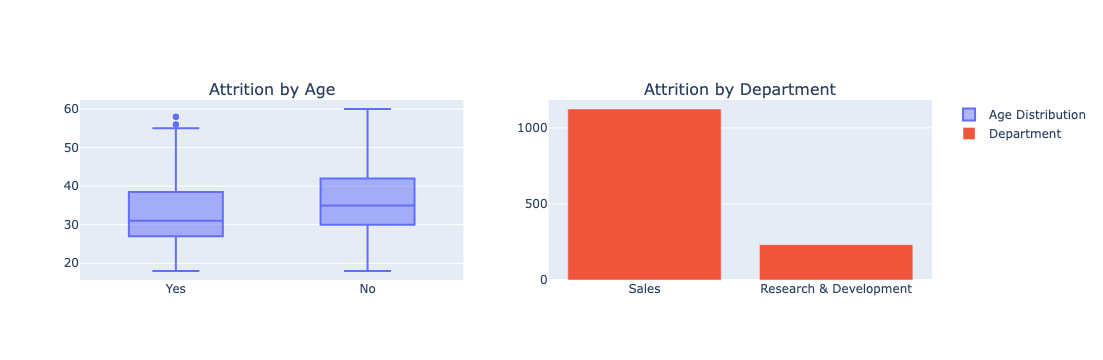

In [145]:
# Attrition by Age and Department
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Attrition by Age', 'Attrition by Department'))

fig.add_trace(go.Box(x=clean_df['Attrition'], y=clean_df['Age'], name='Age Distribution'), row=1, col=1)
fig.add_trace(go.Bar(x=clean_df['Department'], y=clean_df['Attrition'].value_counts(), name='Department'),
              row=1, col=2)
fig.show()

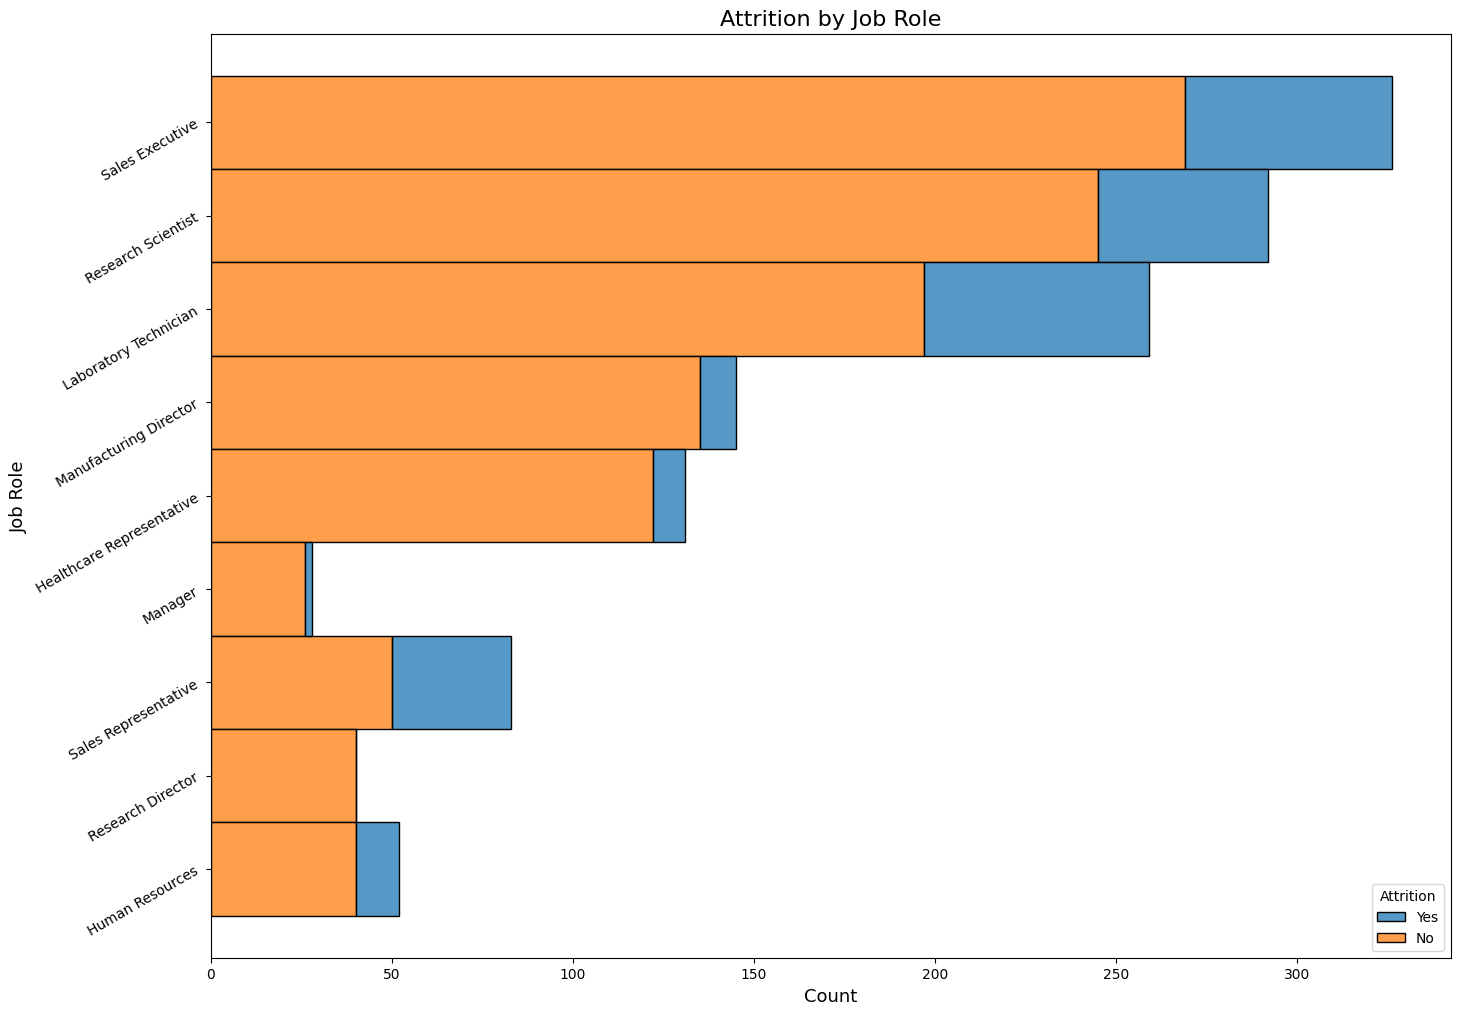

In [143]:
# Attrition by Job Role
plt.figure(figsize=(16, 12))
sns.histplot(data=clean_df, y='JobRole', hue='Attrition', multiple='stack')
plt.yticks(rotation=30)
plt.ylabel('Job Role', fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title('Attrition by Job Role', fontsize=16)
plt.show()